In [12]:
"""
Notebook con analisis de presencia de caos otros indicadores para datos SARS-CoV-II en comunas de Chile. Principalmente se ocupa la librería "tseriesChaos" de R para obtener los resultados. Este notebook sirve netamente para visualizar y analisar los datos obtenidos de R.

- MCLE

"""

'\nNotebook con analisis de presencia de caos otros indicadores para datos SARS-CoV-II en comunas de Chile. Principalmente se ocupa la librería "tseriesChaos" de R para obtener los resultados. Este notebook sirve netamente para visualizar y analisar los datos obtenidos de R.\n\n- MCLE\n\n'

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
from matplotlib import animation

sns.set()


from nolitsa import data, dimension, delay, noise, lyapunov
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.tsa.filters.hp_filter import hpfilter

from sklearn.metrics import mutual_info_score
from scipy.stats import chi2_contingency

# Comunas de Santiago

In [14]:
data_muertes_comunas = pd.read_csv(r'C:\Users\ignac\OneDrive - Universidad de Chile\Escritorio\Datos-COVID19\output\producto50\DefuncionesDEIS_confirmadosPorComuna.csv', parse_dates=['Region'], index_col='Region')

ind = pd.read_csv(r'C:\Users\ignac\OneDrive - Universidad de Chile\Escritorio\Datos-COVID19\output\producto50\DefuncionesDEIS_confirmadosPorComuna_T.csv', parse_dates=['Region'], skiprows=[1,2,3,4],index_col='Region').index

In [15]:
data_muertes_comunas

,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,...,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30
Region,,,,,,,,,,,,,,,,,,,,,
Arica y Parinacota,15,Arica,15101.0,247552.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Magallanes y la Antartica,12,Rio Verde,12103.0,211.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Magallanes y la Antartica,12,San Gregorio,12104.0,681.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Magallanes y la Antartica,12,Timaukel,12303.0,282.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
data_muertes_comunas_SCL = data_muertes_comunas[data_muertes_comunas['Codigo region']==13].drop(columns=['Codigo region',	'Codigo comuna', 'Poblacion'])

data_muertes_comunas_SCL = data_muertes_comunas_SCL.set_index('Comuna')

In [17]:
highest_social_priority = ['La Pintana', 'Lo Espejo', 'Cerro Navia', 'San Ramon']

high_social_priority = ['Conchali', 'Lo Prado', 'San Joaquin', 'San Bernardo', 'El Bosque', 'Recoleta']

middle_social_priority = ['Independencia', 'Quinta Normal', 'La Granja','Estacion Central', 'Pedro Aguirre Cerda', 'Penaflor', 'Renca','La Cisterna', 'Pudahuel']

low_social_priority = ['Cerrillos', 'Puente Alto', 'Penalolen', 'La Florida', 'Maipu', 'Huechuraba', 'Santiago', 'Quilicura', 'Macul', 'San Miguel']

lowest_social_priority = ['Nunoa', 'La Reina', 'Lo Barnechea', 'Providencia', 'Las Condes', 'Vitacura']

dt_deaths_highest_social_priority = data_muertes_comunas_SCL.loc[highest_social_priority]

dt_deaths_high_social_priority = data_muertes_comunas_SCL.loc[high_social_priority]

dt_deaths_middle_social_priority = data_muertes_comunas_SCL.loc[middle_social_priority]

dt_deaths_low_social_priority = data_muertes_comunas_SCL.loc[low_social_priority]

dt_deaths_lowest_social_priority = data_muertes_comunas_SCL.loc[lowest_social_priority]

In [18]:
dt_deaths_highest_social_priority = dt_deaths_highest_social_priority.sum()

dt_deaths_high_social_priority = dt_deaths_high_social_priority.sum()

dt_deaths_middle_social_priority = dt_deaths_middle_social_priority.sum()

dt_deaths_low_social_priority = dt_deaths_low_social_priority.sum()

dt_deaths_lowest_social_priority = dt_deaths_lowest_social_priority.sum()

dt_deaths_highest_social_priority.index = ind
dt_deaths_high_social_priority.index = ind
dt_deaths_middle_social_priority.index = ind
dt_deaths_low_social_priority.index = ind
dt_deaths_lowest_social_priority.index = ind

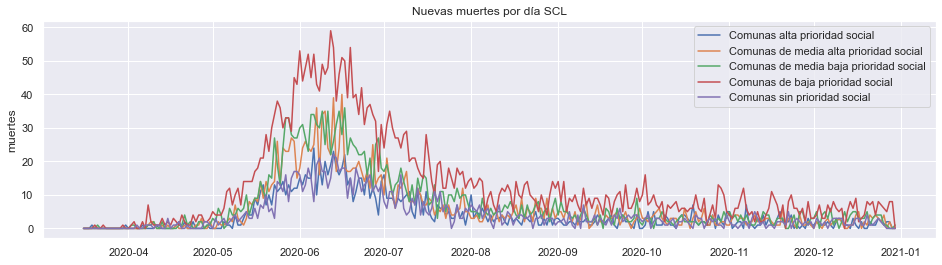

In [23]:
plt.figure(1, figsize=(16,4))
plt.clf()
plt.plot(dt_deaths_highest_social_priority, label='Comunas alta prioridad social')
plt.plot(dt_deaths_high_social_priority, label='Comunas de media alta prioridad social')
plt.plot(dt_deaths_middle_social_priority, label='Comunas de media baja prioridad social')
plt.plot(dt_deaths_low_social_priority, label='Comunas de baja prioridad social')
plt.plot(dt_deaths_lowest_social_priority, label='Comunas sin prioridad social')
plt.title('Nuevas muertes por día SCL')
plt.ylabel('muertes')
plt.legend()
plt.show()

#### Primero pasamos los datos a csv para leerlos en R

In [20]:
lowest_sp_deaths  = np.array(dt_deaths_lowest_social_priority)
low_sp_deaths = np.array(dt_deaths_low_social_priority)
middle_sp_deaths = np.array(dt_deaths_middle_social_priority)
high_sp_deaths = np.array(dt_deaths_high_social_priority)
highest_sp_deaths = np.array(dt_deaths_highest_social_priority)

lowest_sp_deaths = lowest_sp_deaths / np.max(lowest_sp_deaths)
low_sp_deaths = low_sp_deaths / np.max(low_sp_deaths)
middle_sp_deaths = middle_sp_deaths / np.max(middle_sp_deaths)
high_sp_deaths = high_sp_deaths / np.max(high_sp_deaths)
highest_sp_deaths = highest_sp_deaths / np.max(highest_sp_deaths)

# np.savetxt('lowest_sp_deaths', lowest_sp_deaths, delimiter=',')
# np.savetxt('low_sp_deaths', low_sp_deaths, delimiter=',')
# np.savetxt('middle_sp_deaths', middle_sp_deaths, delimiter=',')
# np.savetxt('high_sp_deaths', high_sp_deaths, delimiter=',')
# np.savetxt('highest_sp_deaths', highest_sp_deaths, delimiter=',')

### Obtenemos el Promedio de Informacion Mutua (AMI) mediante R


In [21]:
AMI_comunas_SCL = pd.read_csv(r'C:\Users\ignac\OneDrive - Universidad de Chile\Escritorio\Modelamietno Matematico\Chaos-Presence-SARS-CoV-II\data_para_R\AMI_comunas_SCL.csv')
AMI_comunas_SCL.head()

,mutual_lowest_sp_deaths,mutual_low_sp_deaths,mutual_middle_sp_deaths,mutual_high_sp_deaths,mutual_highest_sp_deaths
0,2.001531,2.157776,2.046978,1.809791,1.909749
1,0.655469,0.970380,0.813426,0.691694,0.619128
2,0.637162,0.887011,0.809097,0.680917,0.620587
3,0.700768,0.942794,0.821844,0.672656,0.641065
4,0.655843,0.874405,0.799829,0.692818,0.653699


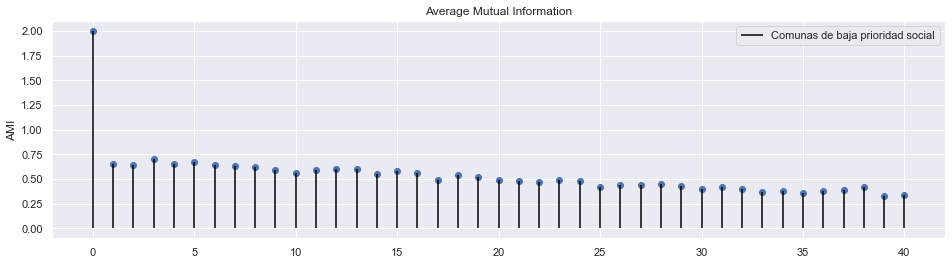

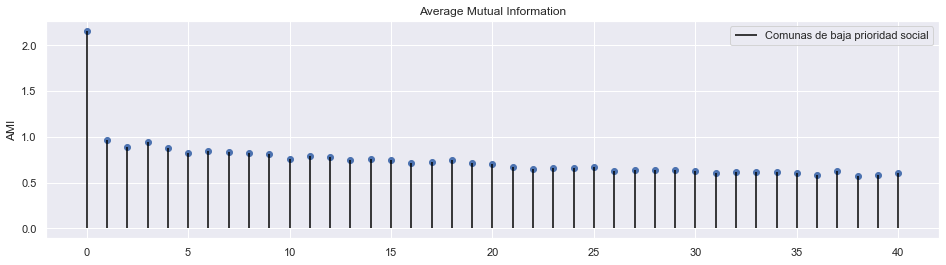

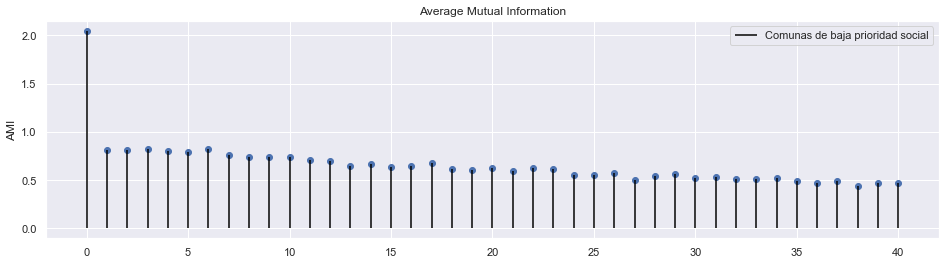

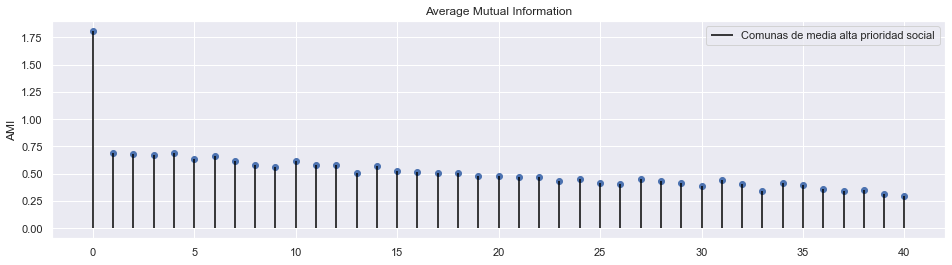

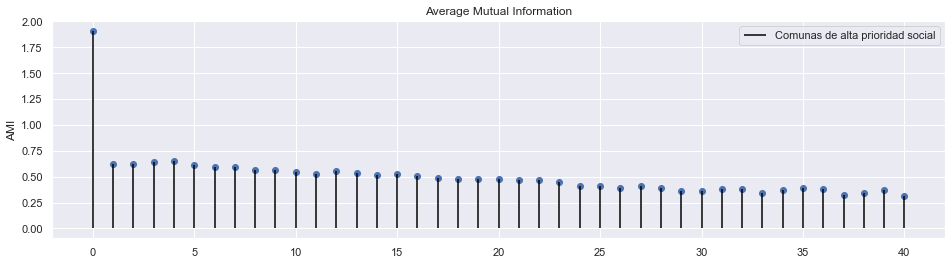

In [22]:
AMI_lowest_sp_deaths = np.array(AMI_comunas_SCL['mutual_lowest_sp_deaths'])
AMI_low_sp_deaths = np.array(AMI_comunas_SCL['mutual_low_sp_deaths'])
AMI_middle_sp_deaths = np.array(AMI_comunas_SCL['mutual_middle_sp_deaths'])
AMI_high_sp_deaths = np.array(AMI_comunas_SCL['mutual_high_sp_deaths'])
AMI_highest_sp_deaths = np.array(AMI_comunas_SCL['mutual_highest_sp_deaths'])

plt.figure(2, figsize=(16,4))
plt.clf()

plt.vlines(np.arange(41), ymin=0, ymax=AMI_lowest_sp_deaths, label='Comunas de baja prioridad social', color='black')
plt.scatter(np.arange(41), AMI_lowest_sp_deaths, marker='o')

plt.legend()
plt.title('Average Mutual Information')
plt.ylabel('AMI')
plt.show()

plt.figure(3, figsize=(16,4))
plt.clf()

plt.vlines(np.arange(41), ymin=0, ymax=AMI_low_sp_deaths, label='Comunas de baja prioridad social', color='black')
plt.scatter(np.arange(41), AMI_low_sp_deaths, marker='o')

plt.legend()
plt.title('Average Mutual Information')
plt.ylabel('AMI')
plt.show()

plt.figure(4, figsize=(16,4))
plt.clf()

plt.vlines(np.arange(41), ymin=0, ymax=AMI_middle_sp_deaths, label='Comunas de baja prioridad social', color='black')
plt.scatter(np.arange(41), AMI_middle_sp_deaths, marker='o')

plt.legend()
plt.title('Average Mutual Information')
plt.ylabel('AMI')
plt.show()


plt.figure(5, figsize=(16,4))
plt.clf()

plt.vlines(np.arange(41), ymin=0, ymax=AMI_high_sp_deaths, label='Comunas de media alta prioridad social', color='black')
plt.scatter(np.arange(41), AMI_high_sp_deaths, marker='o')

plt.legend()
plt.title('Average Mutual Information')
plt.ylabel('AMI')
plt.show()

plt.figure(6, figsize=(16,4))
plt.clf()


plt.vlines(np.arange(41), ymin=0, ymax=AMI_highest_sp_deaths, label='Comunas de alta prioridad social', color='black')
plt.scatter(np.arange(41), AMI_highest_sp_deaths, marker='o')

plt.legend()
plt.title('Average Mutual Information')
plt.ylabel('AMI')
plt.show()


In [24]:
delay_lowest_sp_deaths = []
delay_low_sp_deaths = []
delay_middle_sp_deaths = []
delay_high_sp_deaths = []
delay_highest_sp_deaths = []

for i in range(len(AMI_lowest_sp_deaths)-2):
    if AMI_lowest_sp_deaths[i] > AMI_lowest_sp_deaths[i+1] and AMI_lowest_sp_deaths[i+2] > AMI_lowest_sp_deaths[i+1]:
        delay_lowest_sp_deaths.append(i+1)

for i in range(len(AMI_low_sp_deaths)-2):
    if AMI_low_sp_deaths[i] > AMI_low_sp_deaths[i+1] and AMI_low_sp_deaths[i+2] > AMI_low_sp_deaths[i+1]:
        delay_low_sp_deaths.append(i+1)

for i in range(len(AMI_middle_sp_deaths)-2):
    if AMI_middle_sp_deaths[i] > AMI_middle_sp_deaths[i+1] and AMI_middle_sp_deaths[i+2] > AMI_middle_sp_deaths[i+1]:
        delay_middle_sp_deaths.append(i+1)

for i in range(len(AMI_high_sp_deaths)-2):
    if AMI_high_sp_deaths[i] > AMI_high_sp_deaths[i+1] and AMI_high_sp_deaths[i+2] > AMI_high_sp_deaths[i+1]:
        delay_high_sp_deaths.append(i+1)

for i in range(len(AMI_highest_sp_deaths)-2):
    if AMI_highest_sp_deaths[i] > AMI_highest_sp_deaths[i+1] and AMI_highest_sp_deaths[i+2] > AMI_highest_sp_deaths[i+1]:
        delay_highest_sp_deaths.append(i+1)

print('Tiempos de Retardo para Comunas sin PS muertes:', delay_lowest_sp_deaths)
print('Tiempos de Retardo para Comunas con baja PS muertes:', delay_low_sp_deaths)
print('Tiempos de Retardo para Comunas con media baja PS muertes:', delay_middle_sp_deaths)
print('Tiempos de Retardo para Comunas con media alta PS muertes:', delay_high_sp_deaths)
print('Tiempos de Retardo para Comunas con alta PS muertes:', delay_highest_sp_deaths)

Tiempos de Retardo para Comunas sin PS muertes: [2, 4, 10, 14, 17, 22, 25, 30, 33, 35, 39]
Tiempos de Retardo para Comunas con baja PS muertes: [2, 5, 10, 13, 16, 22, 26, 31, 36, 38]
Tiempos de Retardo para Comunas con media baja PS muertes: [2, 5, 9, 13, 15, 19, 21, 25, 27, 30, 32, 36, 38]
Tiempos de Retardo para Comunas con media alta PS muertes: [3, 5, 9, 13, 19, 23, 26, 30, 33, 37]
Tiempos de Retardo para Comunas con alta PS muertes: [1, 6, 11, 14, 19, 24, 26, 29, 33, 37]


- tau lowest sp deaths = 2, 4, 10
- tau low sp deaths = 2, 5, 10
- tau middle sp deaths = 2, 5, 9
- tau high sp deaths = 3, 5, 9
- tau highest sp deaths = 1, 6, 11


## Obtenemos mediante graficos de separacion espacio-temporales los siguientes Theiler Windows

- tw lowest sp deaths = 13
- tw high sp deaths = 13
- tw highest sp deaths = 10

In [ ]:
loe

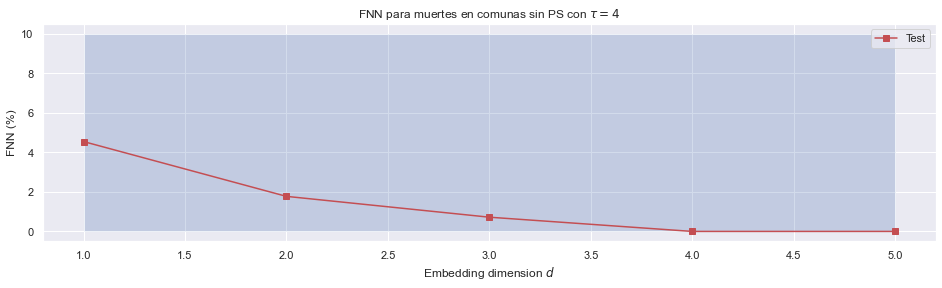

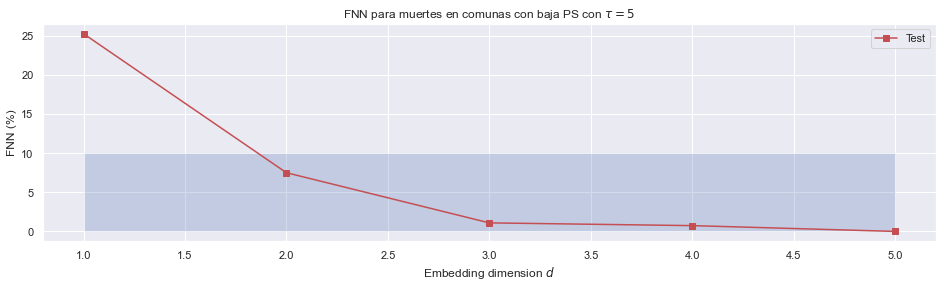

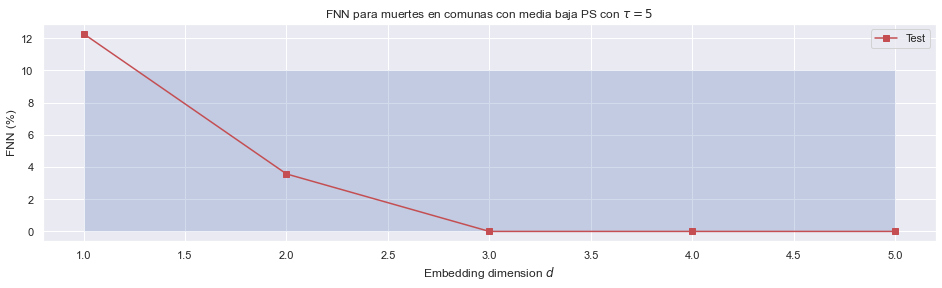

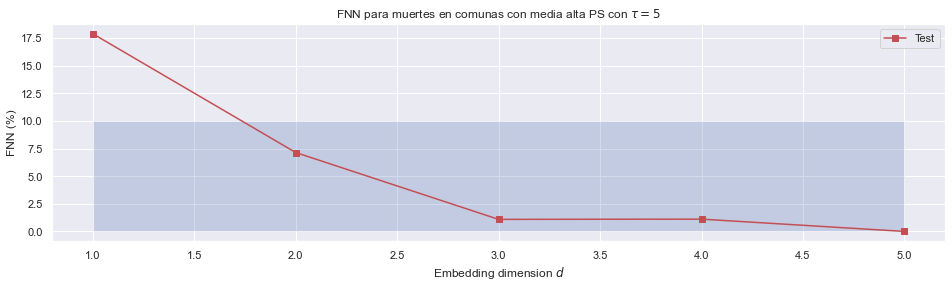

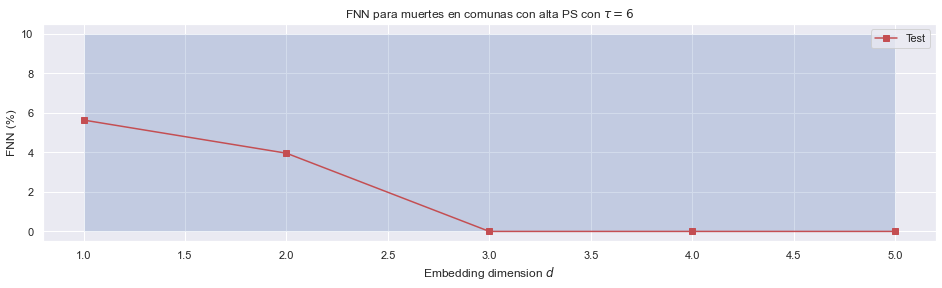

In [25]:
dim = np.arange(1, 6)

f1, f2, f3 = dimension.fnn(lowest_sp_deaths, tau=4, dim=dim, window=13, maxnum=100) #, metric='chebyshev')

plt.figure(7, figsize=(16,4))
plt.clf()
plt.title('FNN para muertes en comunas sin PS con $\\tau=4$')
plt.xlabel('Embedding dimension $d$')
plt.ylabel('FNN (%)')
plt.plot(dim, 100 * f1, 'rs-', label=r'Test')
#plt.plot(dim, 100 * f2, 'g^--', label=r'Test II')
#plt.plot(dim, 100 * f3, 'rs-', label=r'Test I + II')
plt.fill_between(dim, 10, alpha=0.25)
plt.legend()
plt.show()

dim = np.arange(1, 6)

f1, f2, f3 = dimension.fnn(low_sp_deaths, tau=5, dim=dim, window=13, maxnum=100) #, metric='chebyshev')

plt.figure(8, figsize=(16,4))
plt.clf()
plt.title('FNN para muertes en comunas con baja PS con $\\tau=5$')
plt.xlabel('Embedding dimension $d$')
plt.ylabel('FNN (%)')
plt.plot(dim, 100 * f1, 'rs-', label=r'Test')
#plt.plot(dim, 100 * f2, 'g^--', label=r'Test II')
#plt.plot(dim, 100 * f3, 'rs-', label=r'Test I + II')
plt.fill_between(dim, 10, alpha=0.25)
plt.legend()
plt.show()

dim = np.arange(1, 6)

f1, f2, f3 = dimension.fnn(middle_sp_deaths, tau=5, dim=dim, window=13, maxnum=100) #, metric='chebyshev')

plt.figure(9, figsize=(16,4))
plt.clf()
plt.title('FNN para muertes en comunas con media baja PS con $\\tau=5$')
plt.xlabel('Embedding dimension $d$')
plt.ylabel('FNN (%)')
plt.plot(dim, 100 * f1, 'rs-', label=r'Test')
#plt.plot(dim, 100 * f2, 'g^--', label=r'Test II')
#plt.plot(dim, 100 * f3, 'rs-', label=r'Test I + II')
plt.fill_between(dim, 10, alpha=0.25)
plt.legend()
plt.show()

dim = np.arange(1, 6)

f1, f2, f3 = dimension.fnn(high_sp_deaths, tau=5, dim=dim, window=13, maxnum=100) #, metric='chebyshev')

plt.figure(10, figsize=(16,4))
plt.clf()
plt.title('FNN para muertes en comunas con media alta PS con $\\tau=5$')
plt.xlabel('Embedding dimension $d$')
plt.ylabel('FNN (%)')
plt.plot(dim, 100 * f1, 'rs-', label=r'Test')
#plt.plot(dim, 100 * f2, 'g^--', label=r'Test II')
#plt.plot(dim, 100 * f3, 'rs-', label=r'Test I + II')
plt.fill_between(dim, 10, alpha=0.25)
plt.legend()
plt.show()


dim = np.arange(1, 6)

f1, f2, f3 = dimension.fnn(highest_sp_deaths, tau=6, dim=dim, window=13, maxnum=100) #, metric='chebyshev')

plt.figure(11, figsize=(16,4))
plt.clf()
plt.title('FNN para muertes en comunas con alta PS con $\\tau=6$')
plt.xlabel('Embedding dimension $d$')
plt.ylabel('FNN (%)')
plt.plot(dim, 100 * f1, 'rs-', label=r'Test')
#plt.plot(dim, 100 * f2, 'g^--', label=r'Test II')
#plt.plot(dim, 100 * f3, 'rs-', label=r'Test I + II')
plt.fill_between(dim, 10, alpha=0.25)
plt.legend()
plt.show()


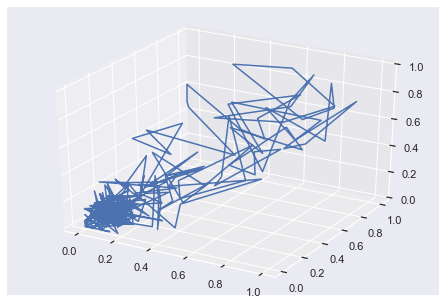

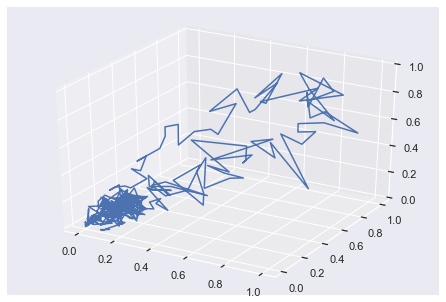

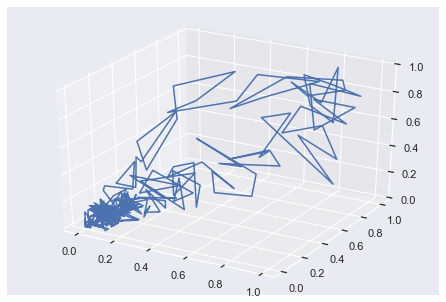

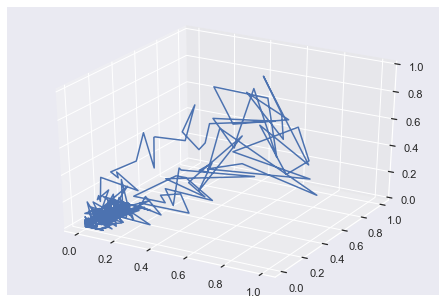

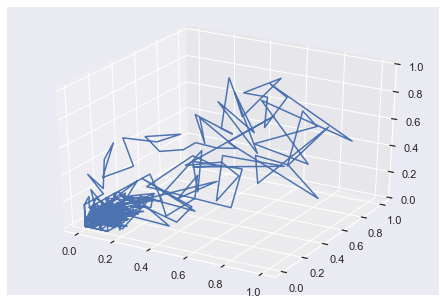

In [27]:
tau_lowest_sp_deaths = 4

figg = plt.figure(12)#, figsize=(8, 7))
plt.clf()
axes = Axes3D(figg)
data_lag0 = np.array(lowest_sp_deaths)[:-2].flatten()
data_lag1 = np.roll(np.array(lowest_sp_deaths), -tau_lowest_sp_deaths)[:-2].flatten()
data_lag2 = np.roll(np.array(lowest_sp_deaths), -2 * tau_lowest_sp_deaths)[:-2].flatten()
axes.plot3D(data_lag0, data_lag1, data_lag2)
figg.add_axes(axes)
plt.show()

tau_low_sp_deaths = 5

figg = plt.figure(13)#, figsize=(8, 7))
plt.clf()
axes = Axes3D(figg)
data_lag0 = np.array(low_sp_deaths)[:-2].flatten()
data_lag1 = np.roll(np.array(low_sp_deaths), -tau_low_sp_deaths)[:-2].flatten()
data_lag2 = np.roll(np.array(low_sp_deaths), -2 * tau_low_sp_deaths)[:-2].flatten()
axes.plot3D(data_lag0, data_lag1, data_lag2)
figg.add_axes(axes)
plt.show()

tau_middle_sp_deaths = 5

figg = plt.figure(14)#, figsize=(8, 7))
plt.clf()
axes = Axes3D(figg)
data_lag0 = np.array(middle_sp_deaths)[:-2].flatten()
data_lag1 = np.roll(np.array(middle_sp_deaths), -tau_middle_sp_deaths)[:-2].flatten()
data_lag2 = np.roll(np.array(middle_sp_deaths), -2 * tau_middle_sp_deaths)[:-2].flatten()
axes.plot3D(data_lag0, data_lag1, data_lag2)
figg.add_axes(axes)
plt.show()

tau_high_sp_deaths = 5

figg = plt.figure(15)#, figsize=(8, 7))
plt.clf()
axes = Axes3D(figg)
data_lag0 = np.array(high_sp_deaths)[:-2].flatten()
data_lag1 = np.roll(np.array(high_sp_deaths), -tau_high_sp_deaths)[:-2].flatten()
data_lag2 = np.roll(np.array(high_sp_deaths), -2 * tau_high_sp_deaths)[:-2].flatten()
axes.plot3D(data_lag0, data_lag1, data_lag2)
figg.add_axes(axes)
plt.show()

tau_highest_sp_deaths = 6

figg = plt.figure(16)#, figsize=(8, 7))
plt.clf()
axes = Axes3D(figg)
data_lag0 = np.array(highest_sp_deaths)[:-2].flatten()
data_lag1 = np.roll(np.array(highest_sp_deaths), -tau_highest_sp_deaths)[:-2].flatten()
data_lag2 = np.roll(np.array(highest_sp_deaths), -2 * tau_highest_sp_deaths)[:-2].flatten()
axes.plot3D(data_lag0, data_lag1, data_lag2)
figg.add_axes(axes)
plt.show()

### También estas dimensiones concuerdan con tseriesChaos de R con

- dim lowest sp deaths = 3
- dim low sp deaths = 2-3
- dim middle sp deaths = 2-3
- dim high sp deaths = 3
- dim highest sp deaths = 3-4

### Calculemos el Maximo Coeficiente del Exponente de Lyapunov (MCLE) mediante $\texttt{tseriesChaos}$ de $\texttt{R}$

- series: time series.
- m: embedding dimension.
- d: time delay.
- t: Theiler window. Points separated by less than t in the series series are excluded from the search for neighbouring points. [Importante para que se tomen vecinos espaciales, y no dados por la dinámica (es decir, temporales)]
- k: number of neighbours considered.
- ref: number of points in series taken into account.
- s: iterations along which the neighbours of each point are followed.
- eps: radius of the ball inside which nearest neighbours are searched for. [Muy importante para que no se considere vecinos a distancias gigantes]

In [28]:
S_nu_comunas_SCL = pd.read_csv(r'C:\Users\ignac\OneDrive - Universidad de Chile\Escritorio\Modelamietno Matematico\Chaos-Presence-SARS-CoV-II\data_para_R\S_nu_comunas_SCL.csv')
S_nu_comunas_SCL.head()

,S_nu_lowest_sp_deaths,S_nu_low_sp_deaths,S_nu_middle_sp_deaths,S_nu_high_sp_deaths,S_nu_highest_sp_deaths
0,-inf,-2.910359,-inf,-inf,-inf
1,-1.648260,-1.996530,-1.995135,-inf,-1.731983
2,-1.662436,-1.997812,-2.002422,-inf,-1.754655
3,-1.617608,-1.954259,-1.988833,-inf,-1.734272
4,-2.177014,-1.932752,-1.932121,-2.097585,-inf


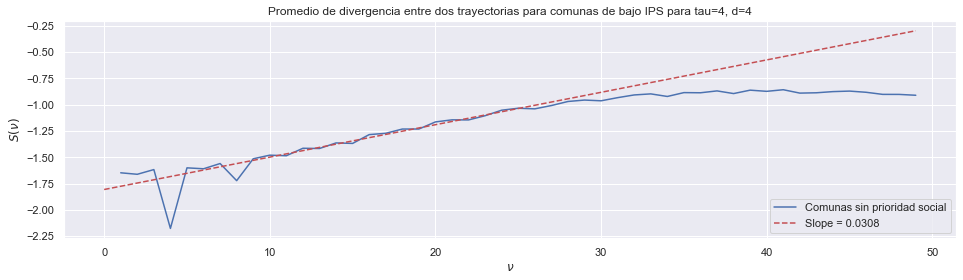

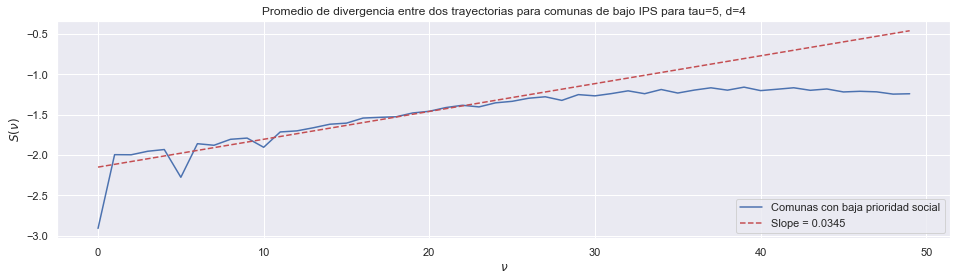

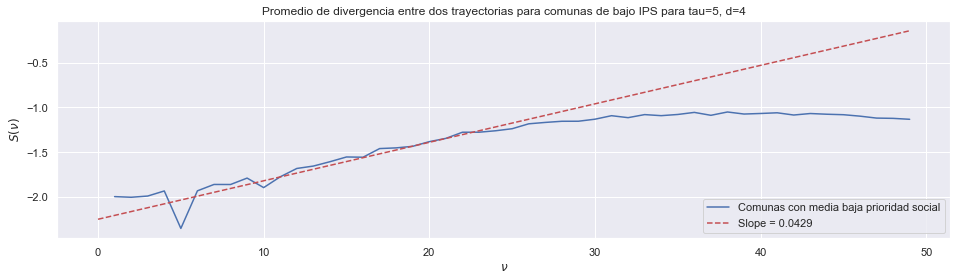

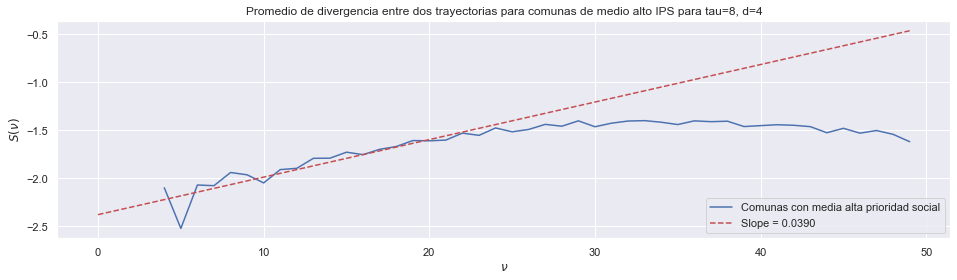

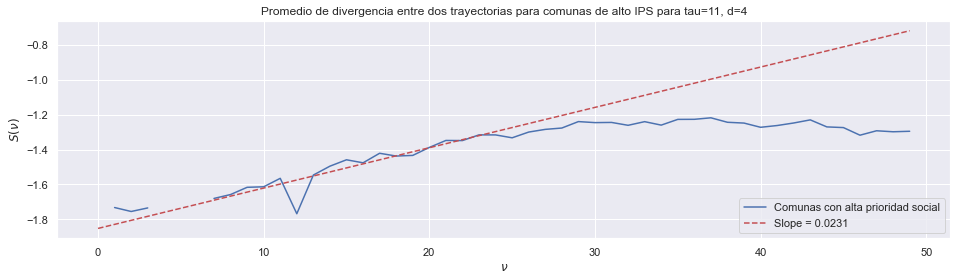

In [30]:
tau_lowest_sp_deaths = 4
tau_high_sp_deaths = 8
tau_highest_sp_deaths = 11


S_nu_lowest_sp_deaths = S_nu_comunas_SCL['S_nu_lowest_sp_deaths']
S_nu_low_sp_deaths = S_nu_comunas_SCL['S_nu_low_sp_deaths']
S_nu_middle_sp_deaths = S_nu_comunas_SCL['S_nu_middle_sp_deaths']
S_nu_high_sp_deaths = S_nu_comunas_SCL['S_nu_high_sp_deaths']
S_nu_highest_sp_deaths = S_nu_comunas_SCL['S_nu_highest_sp_deaths']

nu = np.arange(len(S_nu_lowest_sp_deaths))

MCLE_lowest_sp_deaths, intercept, r_value, p_value, std_err = sp.stats.linregress(nu[5:27], S_nu_lowest_sp_deaths[5:27])

plt.figure(20, figsize=(16,4))
plt.clf()
plt.plot(nu, S_nu_lowest_sp_deaths, label='Comunas sin prioridad social')
plt.plot(nu, MCLE_lowest_sp_deaths*nu + intercept, linestyle='--', label='Slope = {:.4f}'.format(MCLE_lowest_sp_deaths), color='r')
plt.title('Promedio de divergencia entre dos trayectorias para comunas de bajo IPS para tau={}, d=4'.format(tau_lowest_sp_deaths))
plt.ylabel('$S(\\nu)$')
plt.xlabel('$\\nu$')
plt.legend(loc=4)
plt.show()


nu = np.arange(len(S_nu_low_sp_deaths))

MCLE_low_sp_deaths, intercept, r_value, p_value, std_err = sp.stats.linregress(nu[5:27], S_nu_low_sp_deaths[5:27])

plt.figure(20, figsize=(16,4))
plt.clf()
plt.plot(nu, S_nu_low_sp_deaths, label='Comunas con baja prioridad social')
plt.plot(nu, MCLE_low_sp_deaths*nu + intercept, linestyle='--', label='Slope = {:.4f}'.format(MCLE_low_sp_deaths), color='r')
plt.title('Promedio de divergencia entre dos trayectorias para comunas de bajo IPS para tau={}, d=4'.format(tau_low_sp_deaths))
plt.ylabel('$S(\\nu)$')
plt.xlabel('$\\nu$')
plt.legend(loc=4)
plt.show()


nu = np.arange(len(S_nu_middle_sp_deaths))

MCLE_middle_sp_deaths, intercept, r_value, p_value, std_err = sp.stats.linregress(nu[5:27], S_nu_middle_sp_deaths[5:27])

plt.figure(20, figsize=(16,4))
plt.clf()
plt.plot(nu, S_nu_middle_sp_deaths, label='Comunas con media baja prioridad social')
plt.plot(nu, MCLE_middle_sp_deaths*nu + intercept, linestyle='--', label='Slope = {:.4f}'.format(MCLE_middle_sp_deaths), color='r')
plt.title('Promedio de divergencia entre dos trayectorias para comunas de bajo IPS para tau={}, d=4'.format(tau_middle_sp_deaths))
plt.ylabel('$S(\\nu)$')
plt.xlabel('$\\nu$')
plt.legend(loc=4)
plt.show()


nu = np.arange(len(S_nu_high_sp_deaths))

MCLE_high_sp_deaths, intercept, r_value, p_value, std_err = sp.stats.linregress(nu[5:25], S_nu_high_sp_deaths[5:25])

plt.figure(20, figsize=(16,4))
plt.clf()
plt.plot(nu, S_nu_high_sp_deaths, label='Comunas con media alta prioridad social')
plt.plot(nu, MCLE_high_sp_deaths*nu + intercept, linestyle='--', label='Slope = {:.4f}'.format(MCLE_high_sp_deaths), color='r')
plt.title('Promedio de divergencia entre dos trayectorias para comunas de medio alto IPS para tau={}, d=4'.format(tau_high_sp_deaths))
plt.ylabel('$S(\\nu)$')
plt.xlabel('$\\nu$')
plt.legend(loc=4)
plt.show()

nu = np.arange(len(S_nu_highest_sp_deaths))

MCLE_highest_sp_deaths, intercept, r_value, p_value, std_err = sp.stats.linregress(nu[7:25], S_nu_highest_sp_deaths[7:25])

plt.figure(20, figsize=(16,4))
plt.clf()
plt.plot(nu, S_nu_highest_sp_deaths, label='Comunas con alta prioridad social')
plt.plot(nu, MCLE_highest_sp_deaths*nu + intercept, linestyle='--', label='Slope = {:.4f}'.format(MCLE_highest_sp_deaths), color='r')
plt.title('Promedio de divergencia entre dos trayectorias para comunas de alto IPS para tau={}, d=4'.format(tau_highest_sp_deaths))
plt.ylabel('$S(\\nu)$')
plt.xlabel('$\\nu$')
plt.legend(loc=4)
plt.show()


In [32]:
data = {'': ['Comunas sin PS muertes', 'Comunas con baja PS muertes', 'Comunas con media baja PS muertes', 'Comunas con  media alta PS muertes', 'Comunas con alta PS muertes'], 'MCLE': 365*np.round([MCLE_lowest_sp_deaths, MCLE_low_sp_deaths, MCLE_middle_sp_deaths, MCLE_high_sp_deaths, MCLE_highest_sp_deaths], 5),'dim inmersion':[3, 3, 3, 3, 3], 'delay': [4, 5, 5, 5, 6], 'tw':[13, 13, 13, 13, 10]}
NN = pd.DataFrame(data)
NN

,,MCLE,dim inmersion,delay,tw
0,Comunas sin PS muertes,11.24200,3,4,13
1,Comunas con baja PS muertes,12.58885,3,5,13
2,Comunas con media baja PS muertes,15.66215,3,5,13
3,Comunas con media alta PS muertes,14.25325,3,5,13
4,Comunas con alta PS muertes,8.43515,3,6,10


# Obtenemos el MCLE de todas las comunas de SCL

In [117]:
data_muertes_comunas[]

,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,...,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30
Region,,,,,,,,,,,,,,,,,,,,,
Arica y Parinacota,15,Arica,15101.0,247552.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Magallanes y la Antartica,12,Rio Verde,12103.0,211.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Magallanes y la Antartica,12,San Gregorio,12104.0,681.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Magallanes y la Antartica,12,Timaukel,12303.0,282.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
data_muertes_comunas_SCL = data_muertes_comunas[data_muertes_comunas['Codigo region']==13].drop(columns=['Codigo region', 'Codigo comuna', 'Poblacion'])


data_muertes_comunas_SCL = data_muertes_comunas_SCL.set_index('Comuna')

In [130]:
codigo comunas = [13101, 13102, 13103, 13104, 13105, 13106, 13107, 13108, 13109, 13110, 13111, 13112, 13113, 13114, 13115, 13116, 13117, 13118, 13119, 13120, 13121, 13122, 13123, 13124, 13125, 13126, 13127, 13128, 13129, 13130
, 13131, 13132]



Comuna        Alhue
2020-03-16        0
2020-03-17        0
2020-03-18        0
2020-03-19        0
              ...  
2020-12-26        0
2020-12-27        0
2020-12-28        0
2020-12-29        0
2020-12-30        1
Name: 13502.0, Length: 291, dtype: object

In [140]:
comunas = data_muertes_comunas_SCL.index

In [146]:
data_muertes_comunas_SCL.loc['Providencia']

2020-03-16    0.0
2020-03-17    0.0
2020-03-18    0.0
2020-03-19    0.0
2020-03-20    0.0
             ... 
2020-12-26    0.0
2020-12-27    0.0
2020-12-28    0.0
2020-12-29    0.0
2020-12-30    0.0
Name: Providencia, Length: 290, dtype: float64

In [147]:
# for comuna in comunas:
#     time_serie = np.array(data_muertes_comunas_SCL.loc[comuna])
#     time_serie = time_serie / np.max(time_serie)

#     np.savetxt('comuna_SCL_' + comuna, time_serie, delimiter=',')

In [148]:
comunas

Index(['Alhue', 'Buin', 'Calera de Tango', 'Cerrillos', 'Cerro Navia',
       'Colina', 'Conchali', 'Curacavi', 'El Bosque', 'El Monte',
       'Estacion Central', 'Huechuraba', 'Independencia', 'Isla de Maipo',
       'La Cisterna', 'La Florida', 'La Granja', 'La Pintana', 'La Reina',
       'Lampa', 'Las Condes', 'Lo Barnechea', 'Lo Espejo', 'Lo Prado', 'Macul',
       'Maipu', 'Maria Pinto', 'Melipilla', 'Nunoa', 'Padre Hurtado', 'Paine',
       'Pedro Aguirre Cerda', 'Penaflor', 'Penalolen', 'Pirque', 'Providencia',
       'Pudahuel', 'Puente Alto', 'Quilicura', 'Quinta Normal', 'Recoleta',
       'Renca', 'San Bernardo', 'San Joaquin', 'San Jose de Maipo',
       'San Miguel', 'San Pedro', 'San Ramon', 'Santiago', 'Talagante',
       'Tiltil', 'Vitacura', 'Desconocido Metropolitana'],
      dtype='object', name='Comuna')

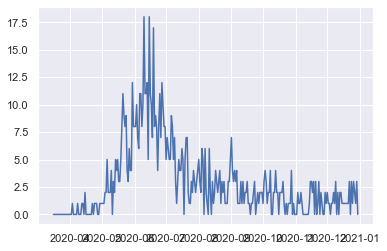

In [161]:
vitacura = data_muertes_comunas_SCL.loc['Puente Alto']
vitacura.index = ind
plt.plot(vitacura)

In [ ]:


lowest_sp_deaths  = np.array(dt_deaths_lowest_social_priority)
high_sp_deaths = np.array(dt_deaths_high_social_priority)
highest_sp_deaths = np.array(dt_deaths_highest_social_priority)

lowest_sp_deaths = lowest_sp_deaths / np.max(lowest_sp_deaths)
high_sp_deaths = high_sp_deaths / np.max(high_sp_deaths)
highest_sp_deaths = highest_sp_deaths / np.max(highest_sp_deaths)

# np.savetxt('lowest_sp_deaths', lowest_sp_deaths, delimiter=',')
# np.savetxt('high_sp_deaths', high_sp_deaths, delimiter=',')
# np.savetxt('highest_sp_deaths', highest_sp_deaths, delimiter=',')